In [1]:
# HIDDEN

from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

cones = Table.read_table('cones.csv')
nba = Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY')
movies = Table.read_table('movies_by_year.csv')

We can now apply Python to analyze data. We will work with data stored in Table structures.

Tables are a fundamental way of representing data sets. A table can be viewed in two ways:
* a sequence of named columns that each describe a single attribute of all entries in a data set, or
* a sequence of rows that each contain all information about a single individual in a data set.

We will study tables in great detail in the next several chapters. For now, we will just introduce a few methods without going into technical details. 

The table `cones` has been imported for us; later we will see how, but here we will just work with it. First, let's take a look at it.

In [7]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


The table has six rows. Each row corresponds to one ice cream cone. The ice cream cones are the *individuals*.

Each cone has three attributes: flavor, color, and price. Each column contains the data on one of these attributes, and so all the entries of any single column are of the same kind. Each column has a label. We will refer to columns by their labels.

A table method is just like a function, but it must operate on a table. So the call looks like

`name_of_table.method(arguments)`

For example, if you want to see just the first two rows of a table, you can use the table method `show`.

In [11]:
cones.show(2)

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75


You can replace 2 by any number of rows. If you ask for more than six, you will only get six, because `cones` only has six rows.

### Choosing Sets of Columns ###
The method `select` creates a new table consisting of only the specified columns.

In [8]:
cones.select('Flavor')

Flavor
strawberry
chocolate
chocolate
strawberry
chocolate
bubblegum


This leaves the original table unchanged.

In [12]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


You can select more than one column, by separating the column labels by commas.

In [13]:
cones.select('Flavor', 'Price')

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


You can also *drop* columns you don't want. The table above can be created by dropping the `Color` column.

In [14]:
cones.drop('Color')

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


You can name this new table and look at it again by just typing its name.

In [15]:
no_colors = cones.drop('Color')

no_colors

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


Like `select`, the `drop` method creates a smaller table and leaves the original table unchanged. In order to explore your data, you can create any number of smaller tables by using choosing or dropping columns. It will do no harm to your original data table.

### Sorting Rows ###

The `sort` method creates a new table by arranging the rows of the original table in ascending order of the values in the specified column. Here the `cones` table has been sorted in ascending order of the price of the cones.

In [16]:
cones.sort('Price')

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
bubblegum,pink,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25


To sort in descending order, you can use an *optional* argument to `sort`. As the name implies, optional arguments don't have to be used, but they can be used if you want to change the default behavior of a method. 

By default, `sort` sorts in increasing order of the values in the specified column. To sort in decreasing order, use the optional argument `descending=True`.

In [17]:
cones.sort('Price', descending=True)

Flavor,Color,Price
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75
chocolate,light brown,4.75
strawberry,pink,3.55


Like `select` and `drop`, the `sort` method leaves the original table unchanged.

### Selecting Rows that Satisfy a Condition ###
The `where` method creates a new table consisting only of the rows that satisfy a given condition. In this section we will work with a very simple condition, which is that the value in a specified column must be equal to a value that we also specify. Thus the `where` method has two arguments.

The code in the cell below creates a table consisting only of the rows corresponding to chocolate cones.

In [18]:
cones.where('Flavor', 'chocolate')

Flavor,Color,Price
chocolate,light brown,4.75
chocolate,dark brown,5.25
chocolate,dark brown,5.25


The arguments, separated by a comma, are the label of the column and the value we are looking for in that column. The `where` method can also be used when the condition that the rows must satisfy is more complicated. In those situations the call will be a little more complicated as well.

It is important to provide the value exactly. For example, if we specify `Chocolate` instead of `chocolate`, then `where` correctly finds no rows where the flavor is `Chocolate`.

In [19]:
cones.where('Flavor', 'Chocolate')

Flavor,Color,Price


Like all the other table methods in this section, `where` leaves the original table unchanged.

### Example: Salaries in the NBA ###

"The NBA is the highest paying professional sports league in the world," [reported CNN](http://edition.cnn.com/2015/12/04/sport/gallery/highest-paid-nba-players/) in March 2016. The table `nba` contains the [salaries of all National Basketball Association players](https://www.statcrunch.com/app/index.php?dataid=1843341) in 2015-2016.

Each row represents one player. The columns are:

| **Column Label**   | Description                                         |
|--------------------|-----------------------------------------------------|
| `PLAYER`           | Player's name                                       |
| `POSITION`         | Player's position on team                           |
| `TEAM`             | Team name                                           |
|`SALARY`    | Player's salary in 2015-2016, in millions of dollars|
 
The code for the positions is PG (Point Guard), SG (Shooting Guard), PF (Power Forward), SF (Small Forward), and C (Center). But what follows doesn't involve details about how basketball is played.

The first row shows that Paul Millsap, Power Forward for the Atlanta Hawks, had a salary of almost $\$18.7$ million in 2015-2016.

In [20]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


Fans of Stephen Curry can find his row by using `where`.

In [21]:
nba.where('PLAYER', 'Stephen Curry')

PLAYER,POSITION,TEAM,SALARY
Stephen Curry,PG,Golden State Warriors,11.3708


We can also create a new table called `warriors` consisting of just the data for the Golden State Warriors.

In [22]:
warriors = nba.where('TEAM', 'Golden State Warriors')
warriors

PLAYER,POSITION,TEAM,SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


By default, the first 10 lines of a table are displayed. You can use `show` to display more or fewer. To display the entire table, use `show` with no argument in the parentheses.

In [24]:
warriors.show()

PLAYER,POSITION,TEAM,SALARY
Klay Thompson,SG,Golden State Warriors,15.501
Draymond Green,PF,Golden State Warriors,14.2609
Andrew Bogut,C,Golden State Warriors,13.8
Andre Iguodala,SF,Golden State Warriors,11.7105
Stephen Curry,PG,Golden State Warriors,11.3708
Jason Thompson,PF,Golden State Warriors,7.00847
Shaun Livingston,PG,Golden State Warriors,5.54373
Harrison Barnes,SF,Golden State Warriors,3.8734
Marreese Speights,C,Golden State Warriors,3.815
Leandro Barbosa,SG,Golden State Warriors,2.5


The `nba` table is sorted in alphabetical order of the team names. To see how the players were paid in 2015-2016, it is useful to sort the data by salary. Remember that by default, the sorting is in increasing order.

In [25]:
nba.sort('SALARY')

PLAYER,POSITION,TEAM,SALARY
Thanasis Antetokounmpo,SF,New York Knicks,0.030888
Jordan McRae,SG,Phoenix Suns,0.049709
Cory Jefferson,PF,Phoenix Suns,0.049709
Elliot Williams,SG,Memphis Grizzlies,0.055722
Orlando Johnson,SG,Phoenix Suns,0.055722
Phil Pressey,PG,Phoenix Suns,0.055722
Keith Appling,PG,Orlando Magic,0.061776
Sean Kilpatrick,SG,Denver Nuggets,0.099418
Erick Green,PG,Utah Jazz,0.099418
Jeff Ayres,PF,Los Angeles Clippers,0.111444


These figures are somewhat difficult to compare as some of these players changed teams during the season and received salaries from more than one team; only the salary from the last team appears in the table.  

The CNN report is about the other end of the salary scale – the players who are among the highest paid in the world. To identify these players we can sort in descending order of salary and look at the top few rows.

In [26]:
nba.sort('SALARY', descending=True)

PLAYER,POSITION,TEAM,SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Kevin Durant,SF,Oklahoma City Thunder,20.1586
Derrick Rose,PG,Chicago Bulls,20.0931
Dwyane Wade,SG,Miami Heat,20


Kobe Bryant, since retired, was the highest earning NBA player in 2015-2016.

### Line Graphs ###
Line graphs are among the most common visualizations and are often used to study chronological trends and patterns.

The table `movies_by_year` contains data on movies produced by U.S. studios in each of the years 1980 through 2015. The columns are:

| **Column** | Content |
|------------|---------|
| `Year` | Year |
| `Total Gross` | Total domestic box office gross, in millions of dollars, of all movies released |
| `Number of Movies` | Number of movies released |
| `#1 Movie` | Highest grossing movie |

In [3]:
movies

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


The Table method `plot` produces a line graph. It has two arguments: first the column label for the horizontal axis, then the column label for the vertical. Here is a line graph of the number of movies released each year over the years 1980 through 2015.

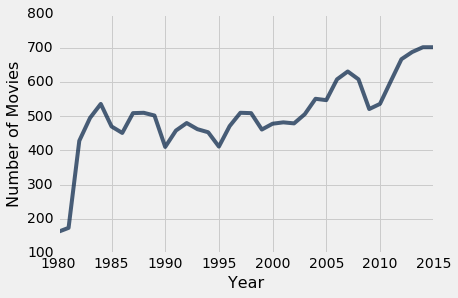

In [4]:
movies.plot('Year', 'Number of Movies')

The graph rises sharply and then has a gentle upwards trend though the numbers vary noticeably from year to year. The sharp rise in the early 1980's is due in part to studios returning to the forefront of movie production after some years of filmmaker driven movies in the 1970's.

The global financial crisis of 2008 has a visible effect – in 2009 there is a sharp drop in the number of movies released.

The dollar figures, however, didn't suffer much.

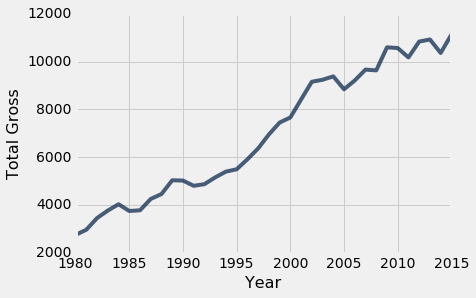

In [5]:
movies.plot('Year', 'Total Gross')

The total domestic gross receipt was higher in 2009 than in 2008, even though there was a financial crisis and a much smaller number of movies were released.

One reason for this apparent contradiction is that people tend to go to the movies when there is a recession. ["In Downturn, Americans Flock to the Movies,"](http://www.nytimes.com/2009/03/01/movies/01films.html?_r=0) said the New York Times in February 2009. The article quotes Martin Kaplan of the University of Southern California saying, "People want to forget their troubles, and they want to be with other people." When holidays and expensive treats are unaffordable, movies provide welcome entertainment and relief.

In 2009, another reason for high box office receipts was the movie Avatar and its 3D release. Not only was Avatar the \#1 movie of 2009, it is also by some calculations the second highest grossing movie of all time, as we will see later.

In [6]:
movies.where('Year', 2009)

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar
